# DATA620: Assignment 6

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

### Data

For this project, we will be working with Davis Southern Club Women network dataset obtained from a previously collected data by Davis et al in 1930s. It represent observed attendance of 18 southern women at 14 social events. It's a simple 2-node network.

* [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis)
* [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
* [Python code to create dataset](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)


The objective of this week's assignment is:

* Load a dataset
* Create basic analysis
* Explore the relationship between (1) the women, and (2) the social events

### Load Required Packages

In [7]:
import networkx as nx
from networkx import algorithms 
import matplotlib.pyplot as plt
import pandas as pd
import networkx.algorithms.bipartite as bipartite

### Exploratory Data Analysis

In [14]:
# Import data
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [15]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [13]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [10]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [23]:
# project bipartite graph onto club nodes
C = bipartite.projected_graph(G, clubs)
print()
print("#Friends, Clubs")
for c in clubs:
    print(f"{C.degree(c)} {c}")


#Friends, Clubs
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


### Degree Centrality

In [24]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [27]:
C = bipartite.weighted_projected_graph(G, clubs)
print()
print("#Friend Meetings, Clubs")
for c in clubs:
    print(f"{C.degree(c, weight='weight')} {c}")


#Friend Meetings, Clubs
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


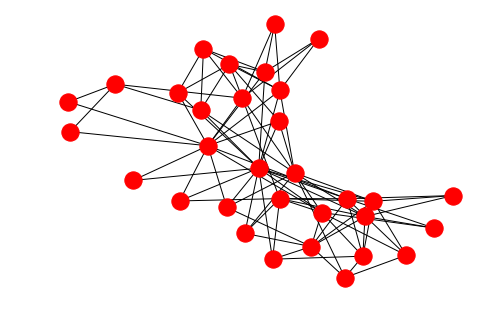

In [16]:
pos = nx.spring_layout(G, seed=123)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()